# モジュールインポート

In [1]:
# scikitlearnのアルゴリズムのロード
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier 

# scikit learnの精度測定ツールの読み込み
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# pandas(pd) とNumpy(np)のモジュール
import numpy as np
import pandas as pd
import sys,os,random
import warnings
import pickle

warnings.filterwarnings('ignore')
%matplotlib inline

# 変数定義

In [2]:
pram_traing_rate=0.8  #トレーニングデータとテストデータの比率
predict_columns=[
#'Date', 
# 'Close',
# 'Open', 
 'day+1', 
 #'day+2', 
 #'day+3', 
 'day+4', 
 'day+5',
 #'day+6',
 'day+7', 
 #'day+8', 
 #'day+9', 
 'day+10', 
 'day+11', 
 #'day+12',
 'day+13', 
 #'day+14', 
 'day+15', 
 'day+16', 
 'day+17', 
 #'day+18', 
 #'day+19',
 #'day+20', 
 'day+21', 
 'day+22', 
 #'day+23', 
 'day+24', 
 #'day+25',
 'day+26',
 'day+27', 
 'day+28',
 'day+29', 
 #'day+30',
 'std-30',
 'std-60', 
 #'std-90',     
 'dow_compare',
 'weekday_0.0', 
 'weekday_1.0', 
 'weekday_2.0',
 #'weekday_3.0',
 'weekday_4.0', 
# 'label_up', 
# 'label_down', 
# 'result'
]

# 前処理済みファイルのロード

In [3]:
# 乱数のシード固定
np.random.seed(0)
random.seed(0)
# データフレームの表示件数の設定
pd.set_option('display.max_columns', 100)

# データロード
df = pd.read_pickle('data/stock_preprocessing.pkl')


y_loc_s=df.columns.get_loc('label_up')
y_loc_e=df.columns.get_loc('label_down')
display(df.tail(3))

# 前後のデータのカット
df=df.loc[30:(len(df)-30)]
df2_num=df.as_matrix()   #numpyへ変換

fx_len=len(df)

,Date,Close,Open,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,std-30,std-60,std-90,dow_compare,weekday_0.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,label_up,label_down,result
4897,2020-09-09,23032.539062,22966.890625,-0.771555,-0.70656,-2.37029,-1.26477,-0.531582,-0.778714,-1.14242,-1.47633,-1.24762,-1.18682,0.234325,-0.242669,-0.159495,-0.134965,-0.566765,-0.959874,-1.53074,-0.67667,0.964729,2.05008,2.37638,2.20357,2.16715,2.62358,4.6443,3.14044,2.12391,1.87634,1.01989,2.09345,47.877090,42.866502,42.324006,0.984804,0,0,1,0,0,1,0,1.002858
4898,2020-09-10,23235.470703,23193.470703,0.986551,0.207384,0.27302,-1.40713,-0.290696,0.449725,0.200155,-0.167138,-0.504346,-0.27338,-0.211978,1.22319,0.741488,0.825483,0.850255,0.414195,0.0172071,-0.559294,0.303206,1.9608,3.05686,3.38637,3.21186,3.17508,3.63601,5.67667,4.15798,3.13141,2.8814,2.0165,42.366502,36.957940,40.453481,1.008255,0,0,0,1,0,1,0,1.001811
4899,2020-09-11,23406.490234,23114.630859,-0.339923,0.643275,-0.133244,-0.0678307,-1.74227,-0.629631,0.108274,-0.140448,-0.506493,-0.842554,-0.612373,-0.55118,0.879107,0.399045,0.482754,0.507442,0.0728644,-0.322774,-0.897315,-0.0377476,1.61421,2.70654,3.03494,2.86102,2.82437,3.28373,5.31745,3.80392,2.78084,2.53168,44.840899,39.308226,41.262994,0.982588,0,0,0,0,1,1,0,1.012627


## データの分割


In [4]:
train, test = train_test_split(df, train_size=pram_traing_rate,shuffle=False)

print("訓練データ  :{}〜{}".format(train.head(1)['Date'].values[0],train.tail(1)['Date'].values[0]),train.shape)
print("テストデータ:{}〜{}".format(test.head(1)['Date'].values[0],test.tail(1)['Date'].values[0]))
#test.to_pickle("data/test.pkl")

訓練データ  :2000-02-17T00:00:00.000000000〜2016-06-23T00:00:00.000000000 (3872, 45)
テストデータ:2016-06-24T00:00:00.000000000〜2020-07-30T00:00:00.000000000


In [5]:
#トレーニングデータと正解ラベルに分割
# 説明変数
trainX,testX=train[predict_columns],test[predict_columns]

# 正解データ
trainY,testY=train.iloc[:,y_loc_s:y_loc_e+1],test.iloc[:,y_loc_s:y_loc_e+1]

#Numpy形式に変換
trainX,testX=trainX.as_matrix(),testX.as_matrix()
trainY,testY=trainY.as_matrix(),testY.as_matrix()

#データサンプル数の確認
print("トレーニングデータ",trainX.shape)
print("トレーニングデータ",trainY.shape)
print("　 　 テストデータ",testX.shape)
print("　 　 テストデータ",testY.shape)
#display("正解ラベルの数",df['label_up'].sum(),df['label_none'].sum(),df['label_down'].sum())

トレーニングデータ (3872, 24)
トレーニングデータ (3872, 2)
　 　 テストデータ (969, 24)
　 　 テストデータ (969, 2)


# sckit-learnの準備


In [6]:
# ワンホットからカテゴリ変数へ
testY2 =np.argmax(testY,axis=1)
trainY2=np.argmax(trainY,axis=1)
trainY2.shape

(3872,)

In [7]:
names = [
         "Random Forest", 
        "Logistic Regression", 
         "SVM",
         "Decision Tree", 
         "Neural Net", 
         "Naive Bayes",
         "AdaBoostClassifier"
        ]

# Initializing Classifiers
classifiers = [
    RandomForestClassifier(random_state=1, n_estimators=100),
    LogisticRegression(),
    SVC(kernel="linear"),
    DecisionTreeClassifier(),
    MLPClassifier(),
    GaussianNB(),
    AdaBoostClassifier()
]

In [8]:
columns=['name','accuracy']
df_acc=pd.DataFrame(data=None,columns=columns)

for classifier, name in zip(classifiers, names):
    
    #　該当分類器にて、学習
    classifier.fit(trainX ,trainY2)
 
    #　分類器の正答率を求める
    pre=classifier.predict(testX)
    ac_score=accuracy_score(testY2,pre)
    print('分類器:{:} , 精度:{:.2%}'.format(name,ac_score))

    # 結果をデータフレームに入れる
    s=pd.Series(data=[name,ac_score],index=columns)
    df_acc=df_acc.append(s,ignore_index=True)

分類器:Random Forest , 精度:50.36%
分類器:Logistic Regression , 精度:49.74%
分類器:SVM , 精度:50.88%
分類器:Decision Tree , 精度:49.95%
分類器:Neural Net , 精度:48.30%
分類器:Naive Bayes , 精度:50.26%
分類器:AdaBoostClassifier , 精度:50.26%


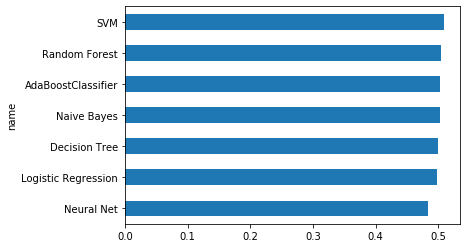

In [9]:
# データフレームの順番を分類器の精度順に表示
df_acc=df_acc.sort_values(by=['accuracy'],ascending=True)
# データフレームのラッパAPIからmatplotのapiをコールして、グラフを作成
df_acc.plot.barh(x='name',y='accuracy',legend=False)

# モデルの保存

In [10]:
classifier=classifiers[
df_acc[df_acc['accuracy']==df_acc['accuracy'].max()].index[0]
]
classifier.fit(trainX ,trainY2)

# モデルを保存する
filename = 'model/sk-learn_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

# ラベルデータ
f = open('./model/predict_columns.txt', 'w')
for x in predict_columns:
    f.write(str(x) + "\n")
f.close()

# テストデータ
test.to_pickle("data/df_test.pkl")

# confusion_matrix

In [11]:
from sklearn import metrics
print("0.label_up  ",test[test['label_up']==1].shape[0])
print("2.label_down",test[test['label_down']==1].shape[0])

predict_y=classifier.predict(testX)
print("confusion matrix:")
print(metrics.confusion_matrix( testY2,predict_y))
print()
print("classification report:")
target_names = ['up','down']

print(metrics.classification_report(testY2,predict_y))

0.label_up   475
2.label_down 494
confusion matrix:
[[ 26 449]
 [ 27 467]]

classification report:
              precision    recall  f1-score   support

           0       0.49      0.05      0.10       475
           1       0.51      0.95      0.66       494

    accuracy                           0.51       969
   macro avg       0.50      0.50      0.38       969
weighted avg       0.50      0.51      0.39       969

